<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**CONTESTO:** Rock o Hip-Hop? Applica metodi di machine learning per classificare i brani in generi musicali, senza doverli ascoltare :) 

**OBIETTIVO:** 

Utilizzando un set di dati composto da brani di due generi musicali (Hip-Hop e Rock), addestrerai un classificatore per distinguere tra i due generi in base solo alle informazioni sui brani derivate dai dati che hai a disposizione. Per prima cosa utilizzerai Pandas per analizzare i dati, aggregare informazioni e creare grafici con Seaborn o MatplotLib.

Successivamente, utilizzerai la libreria scikit-learn per prevedere se puoi classificare correttamente il genere di una canzone in base a caratteristiche come energia, acustica, tempo, ballabilit√† etc..


**Dati a disposizione:**

Qui puoi trovare due fonti dati, uno in formato csv e l'altro in formato json.

https://drive.google.com/drive/folders/1vPd0qBCpWm_QEXM5NRynNrs72-pUuhSn?usp=sharing

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as po
import plotly.express as px


pd.set_option('display.max_rows', 2536)
pd.set_option('display.max_columns', 100)

In [3]:
# Loading of the dataset
df = pd.read_csv("./Dati/dataset.csv")
metrics = pd.read_json('./Dati/metrics.json', precise_float=True)

# Merge the dataframes
df_all = pd.merge(df[['track_id', 'genre_top']], metrics, on='track_id')

## Data cleaning

In [4]:
df_all.columns

Index(['track_id', 'genre_top', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

Plot dei valori nulli

<AxesSubplot: >

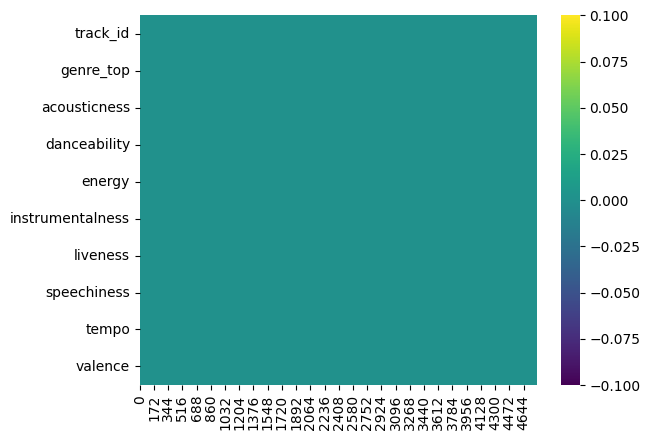

In [5]:
sns.heatmap(df_all.transpose().isnull(), cmap='viridis')

Analizzo le tipologie di dato

In [6]:
df_all.drop('track_id', inplace=True, axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_top         4802 non-null   object 
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
dtypes: float64(8), object(1)
memory usage: 504.2+ KB


## Exploratory data analysis

In [7]:
df_all.head()

genre_top  acousticness  danceability    energy  instrumentalness  liveness  \
0      Rock      0.988306      0.255661  0.979774          0.973006  0.121342   
1      Rock      0.970135      0.352946  0.023852          0.957113  0.113261   
2      Rock      0.981657      0.142249  0.912122          0.967294  0.363510   
3      Rock      0.989141      0.225978  0.722835          0.263076  0.092371   
4      Rock      0.886660      0.298518  0.744333          0.920950  0.139587   

   speechiness   tempo   valence  
0     0.051740  90.241  0.034018  
1     0.032177  53.758  0.035632  
2     0.087527  91.912  0.034325  
3     0.053406  94.322  0.028347  
4     0.088781  97.880  0.073548

In [8]:
df_grouped = df_all.groupby('genre_top').mean().reset_index()
df_melted = pd.melt(df_grouped, id_vars='genre_top', value_vars=['acousticness', 'danceability', 'energy', 
                                                      'instrumentalness','liveness', 'speechiness', 
                                                      'tempo', 'valence'], var_name='feature', value_name='value')

<AxesSubplot: xlabel='feature', ylabel='value'>

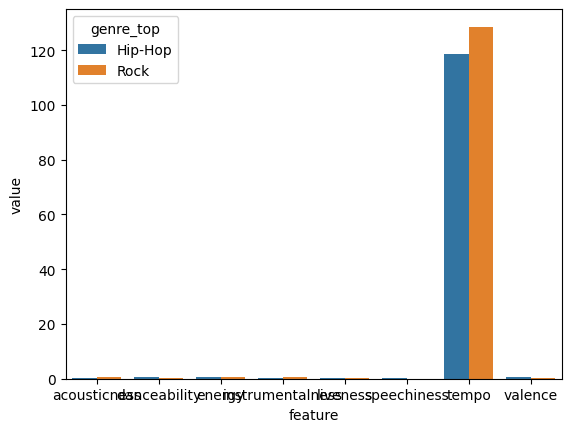

In [9]:
sns.barplot(x='feature', y='value', hue='genre_top', data=df_melted)

### Model performance without scaling

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_all.loc[:, 'acousticness'], df_all.genre_top, test_size = 0.2, random_state=42)